In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.quickplots import draw_projection_plots

In [5]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

### Collect data

In [6]:
DATASET_ID = 'bengalese_finch_sober'

In [7]:
syllable_df = pd.concat([pd.read_pickle(i) for i in list((DATA_DIR / 'indv_dfs' / DATASET_ID).glob('*.pickle'))])

In [8]:
syllable_df[:3]

,start_time,end_time,labels,indv,indvi,key,rate,spectrogram,syllables_sequence_id,syllables_sequence_pos,umap,hdbscan_labels
0,9.029750,9.090969,i,or60yw70,0,or60yw70_011012_0724.503,32000,"[[8, 8, 8, 8, 10, 8, 56, 117, 118, 90, 71, 64,...",0,0,"[-9.551727, 2.7543738]",8
1,9.195656,9.267406,i,or60yw70,0,or60yw70_011012_0724.503,32000,"[[1, 1, 1, 1, 0, 11, 59, 70, 91, 68, 74, 48, 3...",0,1,"[-9.808033, 2.5435884]",8
2,9.321281,9.381656,a,or60yw70,0,or60yw70_011012_0724.503,32000,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, ...",0,2,"[-0.17588094, 10.46355]",1


In [9]:
from avgn.visualization.barcodes import plot_sorted_barcodes, indv_barcode

In [10]:
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR,ensure_dir

In [11]:
label = "hdbscan_labels"

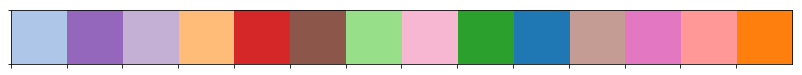

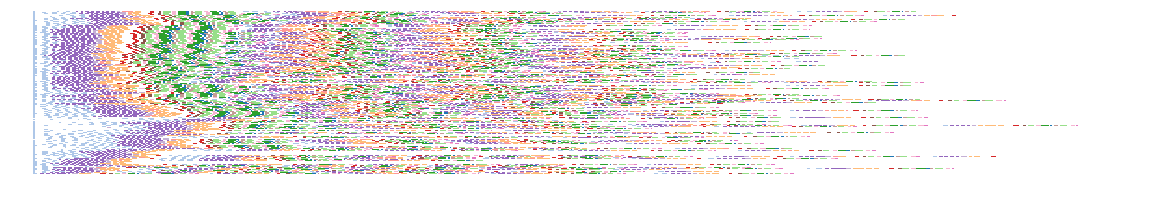

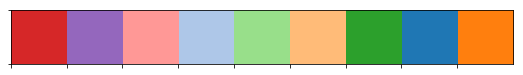

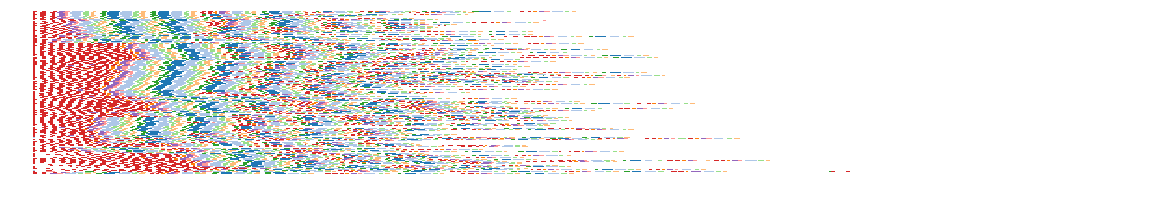

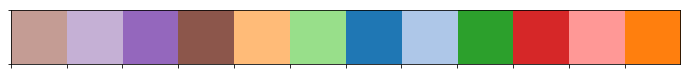

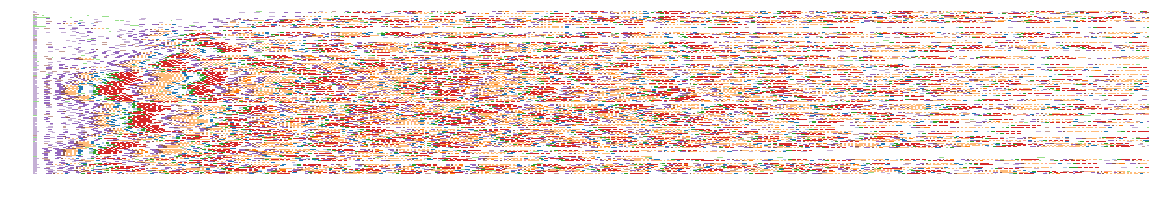

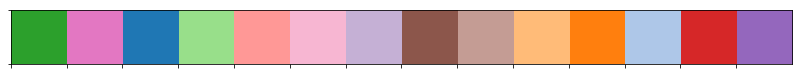

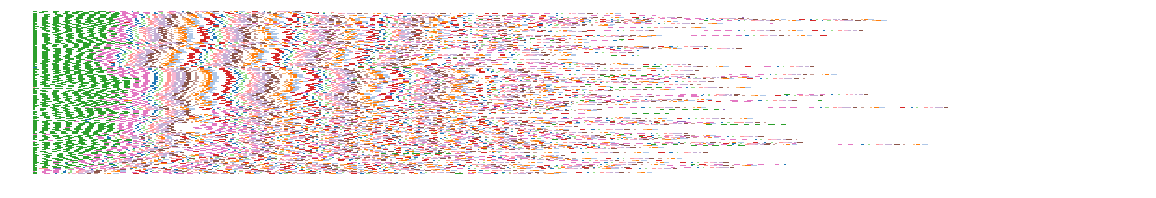

In [12]:
indv_dict = {}
# for each individual in the dataset
for indv in tqdm(syllable_df.indv.unique()):
    color_lists, trans_lists, label_pal_dict, label_pal, label_dict = indv_barcode(
        syllable_df[syllable_df.indv == indv], 
        time_resolution=0.03, 
        label=label, 
        pal="tab20"
    )
    indv_dict[indv] = {
        'label_pal_dict':label_pal_dict,
        'label_dict':label_dict
    }
    fig, ax = plt.subplots(figsize=(20,3))
    plot_sorted_barcodes(color_lists, trans_lists, max_list_len=600, seq_len=100, nex=200, figsize=(10,4), ax=ax);
    ensure_dir(FIGURE_DIR/'barcode2' / DATASET_ID)
    save_fig(FIGURE_DIR / 'barcode2' / DATASET_ID / indv)

### create other viz

In [13]:
# fix unlabelled
for indv in indv_dict:
    if -1 in indv_dict[indv]['label_dict']:
        indv_dict[indv]['label_pal_dict'][indv_dict[indv]['label_dict'][-1]] = [.5,.5,.5]

In [14]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [15]:
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec
import librosa

In [16]:
# make dataset

In [17]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [18]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -25,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [19]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    3.2s


[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:    3.7s finished


In [20]:
indvs = np.array([list(i)[0] for i in dataset.json_indv])

In [21]:
from avgn.visualization.projections import scatter_spec, scatter_projections
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [22]:
from avgn.visualization.projections import draw_projection_transitions
from avgn.visualization.network_graph import plot_network_graph

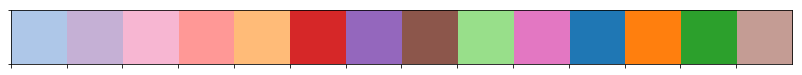

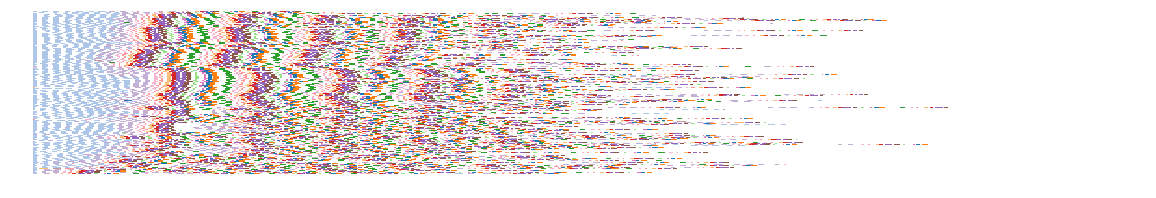

In [25]:
indv_dict = {}
# for each individual in the dataset
for indv in tqdm(syllable_df.indv.unique()):
    if indv != 'gy6or6': 
        continue
    color_lists, trans_lists, label_pal_dict, label_pal, label_dict = indv_barcode(
        syllable_df[syllable_df.indv == indv], 
        time_resolution=0.03, 
        label=label, 
        pal="tab20"
    )
    indv_dict[indv] = {
        'label_pal_dict':label_pal_dict,
        'label_dict':label_dict
    }
    fig, ax = plt.subplots(figsize=(20,3))
    plot_sorted_barcodes(color_lists, trans_lists, max_list_len=600, seq_len=100, nex=200, figsize=(10,4), ax=ax);
    ensure_dir(FIGURE_DIR/'barcode2' / DATASET_ID)
    save_fig(FIGURE_DIR / 'barcode2' / DATASET_ID / indv, save_png=True, save_svg=True)

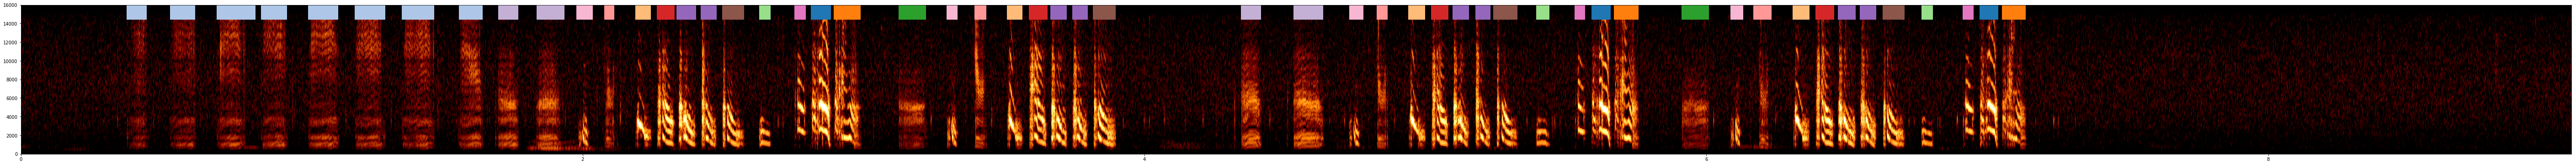

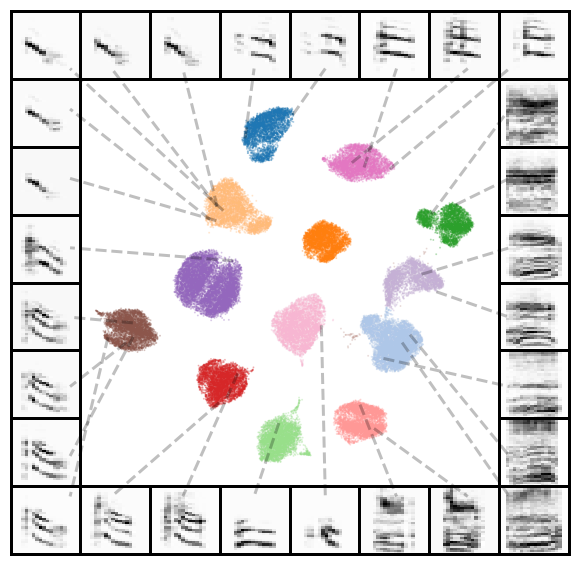

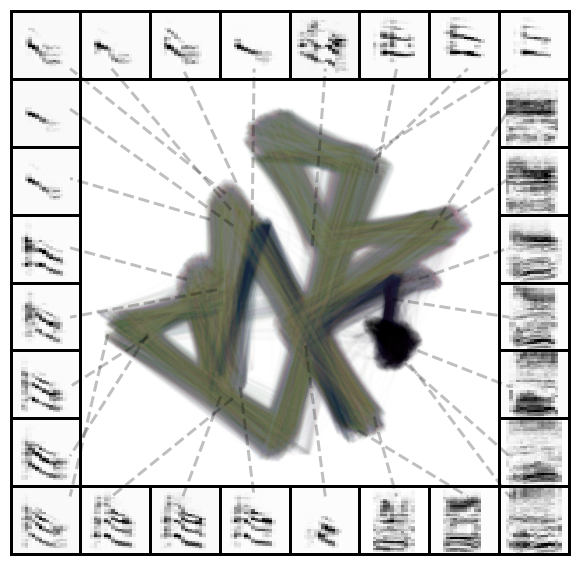

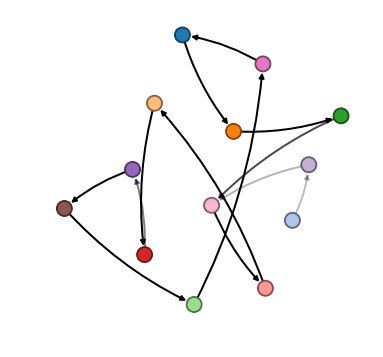

In [27]:
for indv in np.unique(indvs):
    
    if indv != 'gy6or6': 
        continue
    
    # get key for individual
    key = np.array(list(dataset.data_files.keys()))[indvs == indv][0]
    
    # load the wav
    wav, rate = librosa.core.load(dataset.data_files[key].data['wav_loc'], sr=None)
    data = butter_bandpass_filter(wav, 500, 15000, rate)
    
    # create the spectrogram
    spec = spectrogram(
        data,
        rate,
        n_fft=1024,
        hop_length_ms=1,
        win_length_ms=5,
        ref_level_db=20,
        min_level_db=-60,
    )
    
    # plot the spectrogram with labels
    fig, ax = plt.subplots(figsize=(100, 6))
    plot_spec(spec, fig, ax, hop_len_ms=1, rate=rate, show_cbar=False)
    ymin, ymax = ax.get_ylim()
    for ix, row in tqdm(syllable_df[syllable_df.key == key].iterrows()):
        #ax.axvline(row.start_time)
        #ax.axvline(row.end_time)
        color = indv_dict[row.indv]['label_pal_dict'][indv_dict[row.indv]['label_dict'][row[label]]]
        ax.add_patch(
            mpatches.Rectangle(
                [row.start_time, ymax - (ymax - ymin) / 10],
                row.end_time - row.start_time,
                (ymax - ymin) / 10,
                ec="none",
                color=color,
            )
        )
    #ax.set_xlim([0.7, 9.3])
    ax.xaxis.tick_bottom()
    ensure_dir(FIGURE_DIR/'barcode2' / DATASET_ID)
    save_fig(FIGURE_DIR / 'barcode2' / DATASET_ID / (indv+'_spectrogram'), save_png=True)
    plt.show()
    
    
    # plot scatterplot
    indv_df = syllable_df[syllable_df.indv == indv]
    z = np.vstack(indv_df.umap.values)
    label_pal_dict = indv_dict[row.indv]['label_pal_dict']
    label_dict = indv_dict[row.indv]['label_dict']
    colors = [label_pal_dict[label_dict[row[label]]] for idx, row in tqdm(indv_df.iterrows(), total = len(indv_df))]
    
    fig, axs, main_ax = scatter_spec(
        np.vstack(indv_df.umap.values),
        indv_df.spectrogram.values,
        column_size=8,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=0,
        figsize=(10, 10),
        scatter_kwargs = {
            #'labels': list(indv_df.phrase.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,
        show_scatter=False,
    );

    main_ax.scatter(z[:,0], z[:,1], color = colors, alpha = 0.25, s=1)

    ensure_dir(FIGURE_DIR/'barcode2' / DATASET_ID)
    save_fig(FIGURE_DIR / 'barcode2' / DATASET_ID / (indv+'_scatter'), save_png=True)
    plt.show()
    
    # plot transitions
    
    fig, axs, main_ax = scatter_spec(
        np.vstack(indv_df.umap.values),
        indv_df.spectrogram.values,
        column_size=8,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=0,
        figsize=(10, 10),
        scatter_kwargs = {
            #'labels': list(indv_df.phrase.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,
        show_scatter=False,
    );

    draw_projection_transitions(
        np.vstack(indv_df.umap.values),
        indv_df.syllables_sequence_id.values,
        indv_df.syllables_sequence_pos.values,
        ax=main_ax,
        alpha=0.01,
    )

    ensure_dir(FIGURE_DIR/'barcode2' / DATASET_ID)
    save_fig(FIGURE_DIR / 'barcode2' / DATASET_ID / (indv+'_trans'), save_png=True)
    plt.show()
    
    # plot graph
    elements = indv_df[label].values
    projections = np.array(list(indv_df['umap'].values))
    sequence_ids = np.array(indv_df["syllables_sequence_id"])
    pal_dict = {i:label_pal_dict[j] for i,j in label_dict.items()}
    fig, ax = plt.subplots(figsize=(6,6))
    plot_network_graph(
        elements, projections, sequence_ids, color_palette="tab20", ax=ax, pal_dict=pal_dict
    )
    ax.axis('off')
    ensure_dir(FIGURE_DIR/'barcode2' / DATASET_ID)
    save_fig(FIGURE_DIR / 'barcode2' / DATASET_ID / (indv+'_network'), save_svg=True, save_png=True)
    plt.show()
    